### Problem Statement

* I'm Vamshi let's say i'm hired as a data scientist in XYZ company based in India,i'm hired as a fresher and hopefully i got     my first task,it's about a abalone shell.Price of the abalone linearly increases with it's age,age is calculated on the basis
  of no of rings but here the problem is identifying no of rings is not possible by human.it is calculated by microscope and it   is very boring and time consuming procedure.I had a task to solve this problem.

* Company provided the data,data is about the dimension of the abalone shell but it is also a living being there are three       different genders like male,female and infant.With respect to the dimensions i have to predict gender,age and current price     of the abalone shell.

Let's go..


In [1]:
#Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
import statsmodels.api as sm
from plotly.offline import iplot

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split

#Clustering
import scipy.cluster.hierarchy as sch


#Regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


#Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,mean_absolute_error as mae, mean_squared_error as mse, r2_score


#Hyperparameter
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### Loading The Dataset

In [2]:
df = pd.read_csv('ABALONE')
df.head()

Unnamed: 0  Length  Diameter  Height  Whole weight  Shucked weight  \
0           0   0.455     0.365   0.095        0.5140          0.2245   
1           1   0.350     0.265   0.090        0.2255          0.0995   
2           2   0.530     0.420   0.135        0.6770          0.2565   
3           3   0.440     0.365   0.125        0.5160          0.2155   
4           4   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7

### Droping Unwanted Columns

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

# Exploratory Data Analysis

### Head of the Dataset

In [4]:
df.head()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

### Basic Information of the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


### Descriptive Statistics

In [6]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

### Identifying is there any Null values

In [7]:
df.isna().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
df.shape

(4177, 8)

In [9]:
df.columns.to_list()

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

In [10]:
df.corr()

Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weight        0.931961      0.882617  0.420884  
Viscera weight        1.000000      0.907656  0.503819  
Shell weight          0.907656      1.000000  0.627574  
Rings                 0.503819      0.627574  1.000000

# UNSUPERVISED LEARNING

### Splitting the Dataset for Clustering

In [11]:
x=df.iloc[:,:-1].values

### Dendrogram

<Figure size 1440x1440 with 0 Axes>

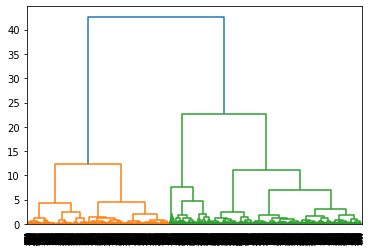

<Figure size 1440x1440 with 0 Axes>

In [12]:
lk = sch.linkage(x,method='ward')
ddg = sch.dendrogram(lk)
plt.figure(figsize=(20,20))

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3)
yhc = hc.fit_predict(x)
yhc

array([0, 0, 0, ..., 1, 1, 2], dtype=int64)

### Visualization of Clusters

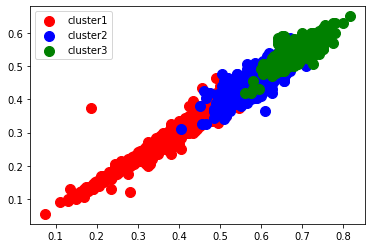

In [14]:
plt.scatter(x[yhc==0,0], x[yhc==0,1], s=100, c="red", label="cluster1")
plt.scatter(x[yhc==1,0], x[yhc==1,1], s=100, c="blue", label="cluster2")
plt.scatter(x[yhc==2,0], x[yhc==2,1], s=100, c="green", label="cluster3")
plt.legend()
plt.show()

In [15]:
df["Class"]=yhc

<AxesSubplot:xlabel='Class', ylabel='count'>

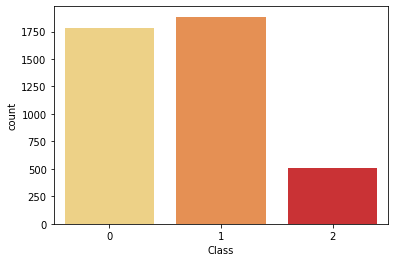

In [16]:
sns.countplot(x='Class',data=df,palette='YlOrRd')

In [17]:
sex=[]
for i in df['Class']:
    if i==0:
        sex.append("Infant")
    if i==1:
        sex.append("Male")
    if i==2:
        sex.append("Female")
        

In [18]:
df.drop("Class",axis=1,inplace=True)

In [19]:
df['Gender'] = pd.DataFrame(sex)

In [20]:
df

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  Gender  
0           0.1500     15  Infant  
1           0.0700      7  Infant  
2           0.2100      9  Infant  
3           0.1550     10  Infant  
4           0.0550      7  Infant  
...            ...    ...     ...  
4172        0.2490     11    Male  
4173        0.2605     10    Male  
4174        0.3080      9    Male  
4175        0.2960     10    Male  
4176        0.4950     12  Female  

[4177 rows x 9 columns]

In [21]:
#df.to_csv('abagender.csv')

# SUPERVISED LEARNING

### DataFrame for Classification

In [22]:
df.head()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Gender  
0         0.150     15  Infant  
1         0.070      7  Infant  
2         0.210      9  Infant  
3         0.155     10  Infant  
4         0.055      7  Infant

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   Gender          4177 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [24]:
df.corr()

Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weight        0.931961      0.882617  0.420884  
Viscera weight        1.000000      0.907656  0.503819  
Shell weight          0.907656      1.000000  0.627574  
Rings                 0.503819      0.627574  1.000000

In [25]:
df.Gender.value_counts()

Male      1885
Infant    1785
Female     507
Name: Gender, dtype: int64

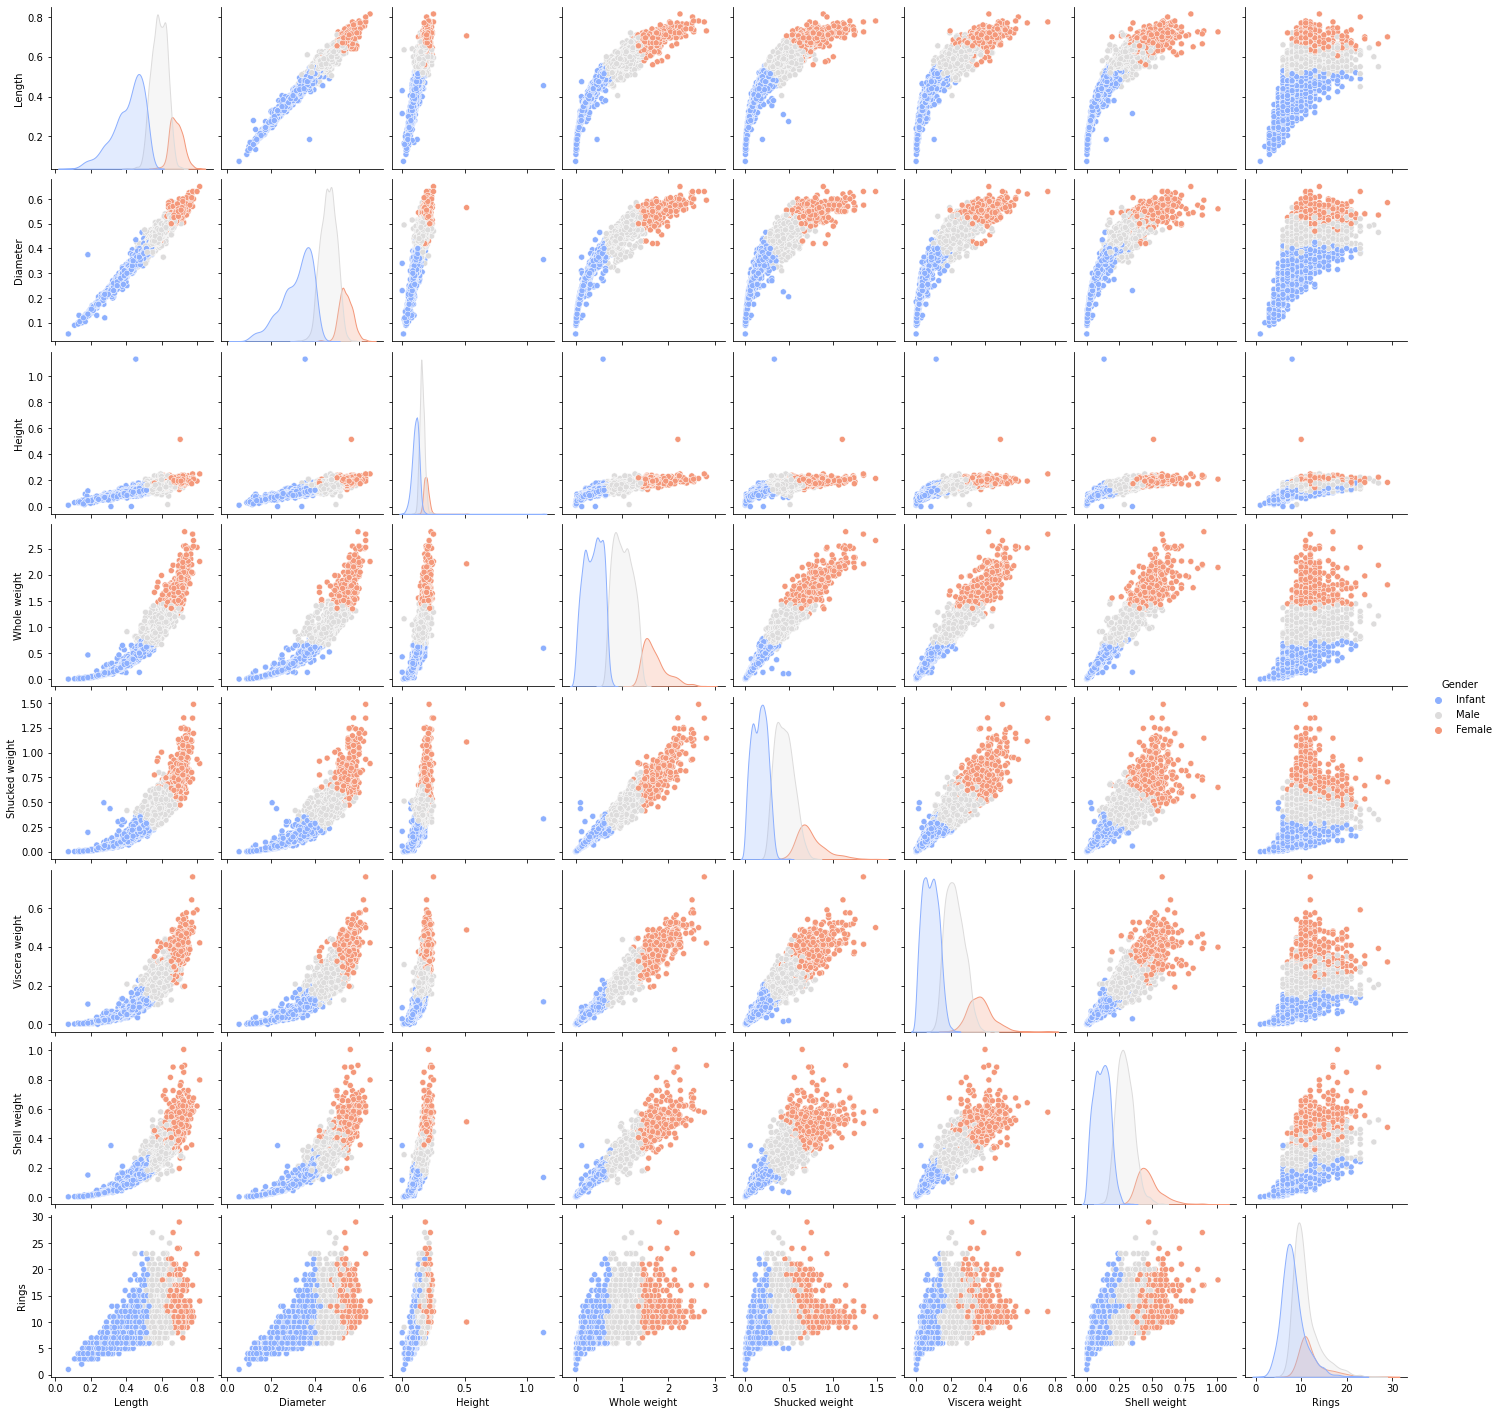

In [26]:
sns.pairplot(data=df,hue='Gender',palette='coolwarm')

# Building A Classification Model

### Splitting the Dataset into Features and Labels

In [27]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

### Dividing in Training and Testing Set

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.22,random_state=100)

### Model Building

In [29]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
   
    print("Training_Score -: ",model.score(xtrain,ytrain))
    print()
    print("Testing_Score -: ",model.score(xtest,ytest))
    print()
    print("Confusion_Matrix -:\n",confusion_matrix(ytest,ypred))
    print()
    print("Classification_Report -: \n",classification_report(ytest,ypred))

In [30]:
models = []

models.append(("Logreg-:",LogisticRegression()))
models.append(("KNN   -:",KNeighborsClassifier()))
models.append(("SVM   -:",SVC()))

for name,model in models:
    print(name)
    mymodel(model)
    print()
    print()
    print()

Logreg-:
Training_Score -:  0.9815837937384899

Testing_Score -:  0.9771490750816104

Confusion_Matrix -:
 [[100   0  13]
 [  0 384   4]
 [  1   3 414]]

Classification_Report -: 
               precision    recall  f1-score   support

      Female       0.99      0.88      0.93       113
      Infant       0.99      0.99      0.99       388
        Male       0.96      0.99      0.98       418

    accuracy                           0.98       919
   macro avg       0.98      0.96      0.97       919
weighted avg       0.98      0.98      0.98       919




KNN   -:
Training_Score -:  0.9868017188459177

Testing_Score -:  0.9684439608269858

Confusion_Matrix -:
 [[100   0  13]
 [  0 380   8]
 [  3   5 410]]

Classification_Report -: 
               precision    recall  f1-score   support

      Female       0.97      0.88      0.93       113
      Infant       0.99      0.98      0.98       388
        Male       0.95      0.98      0.97       418

    accuracy                        

In [31]:
df.head()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Gender  
0         0.150     15  Infant  
1         0.070      7  Infant  
2         0.210      9  Infant  
3         0.155     10  Infant  
4         0.055      7  Infant

### Adding a new continuous column of age by using Rings Column

In [32]:
df['age'] = df['Rings']+1.5

### Dataset for Regression

In [33]:
df.head()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Gender   age  
0         0.150     15  Infant  16.5  
1         0.070      7  Infant   8.5  
2         0.210      9  Infant  10.5  
3         0.155     10  Infant  11.5  
4         0.055      7  Infant   8.5

In [34]:
#df.to_csv('abalone-viznew.csv')

# Exploratory Data Analysis of Regression Dataset

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   Gender          4177 non-null   object 
 9   age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [36]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings          age  
count     4177.000000   4177.000000  4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684    11.433684  
std          0.109614      0.139203     3.224169     3.224169  
min          0.000500      0.001500     1.000000     2.500000  
25%          0.093500      0.130000     8.000000     9.500000  
50%          0.171000      0.234000     9.000000    10.500000  
75%          0.253000      0.329000    11.000000    12.500000  
max          0.760000      1.005000    29.000000    30.500000

In [37]:
df.isna().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Gender            0
age               0
dtype: int64

In [38]:
df.corr()

Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   
age             0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings       age  
Length                0.903018      0.897706  0.556720  0.556720  
Diameter              0.899724      0.905330  0.574660  0.574660  
Height                0.798319      0.817338  0.557467  0.557467  
Whole weight          0.966375      0.955355  0.540390  0.540390  
Shucked weight        0.931961      0.882617  0.420884  0.420884  
Viscera weight        1.000000      0.907656  0.503819  0.503819  
Shell weight          0.907656      1.000000  0.627574  0.627574  
Rings                 0.503819      0.627574  1.000000  1.000000  
age                   0.503819      0.627574  1.000000  1.000000

### 2D Visualization

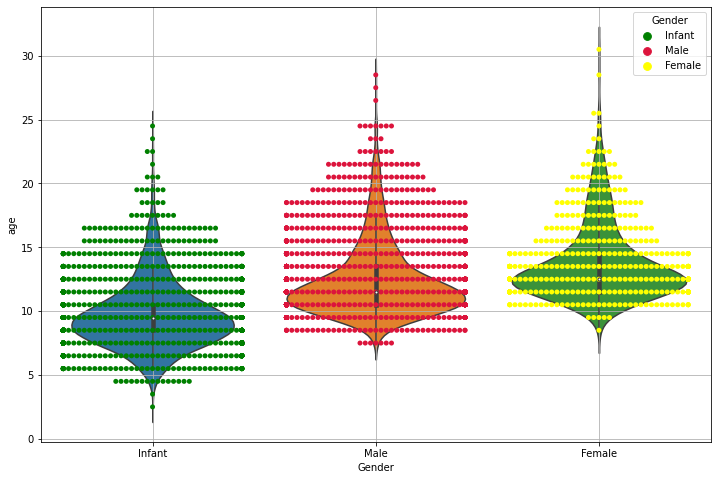

In [39]:
plt.figure(figsize=(12,8))

sns.swarmplot(x='Gender',y='age',data=df,hue='Gender',palette=['green','crimson','Yellow'])
sns.violinplot(x='Gender',y='age',data=df)
plt.grid(True)

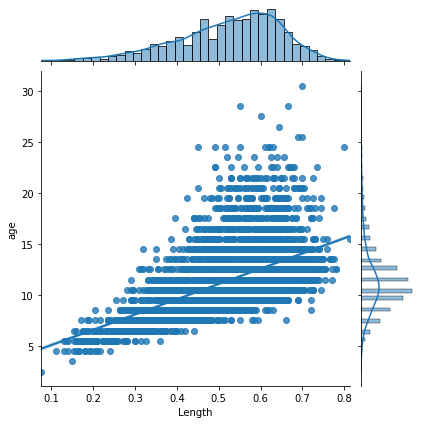

In [40]:
sns.jointplot(x='Length',y='age',data=df,kind='reg')

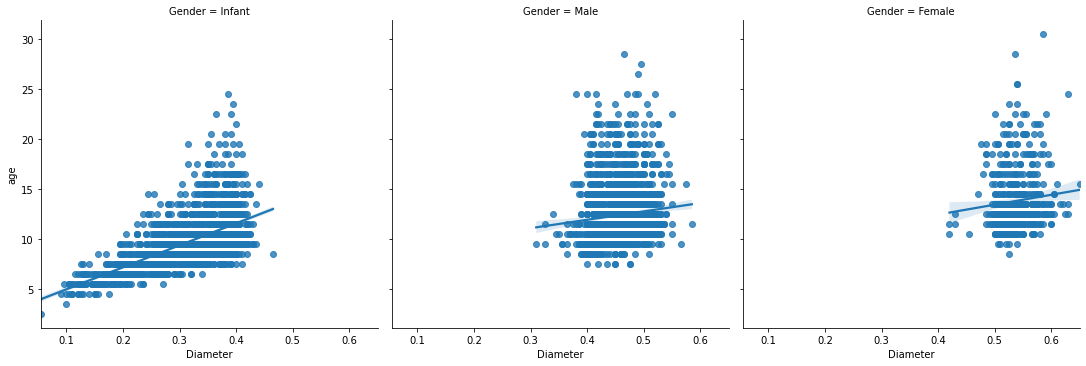

In [41]:
sns.lmplot(x='Diameter',y='age',data=df,col='Gender',palette='crimson')

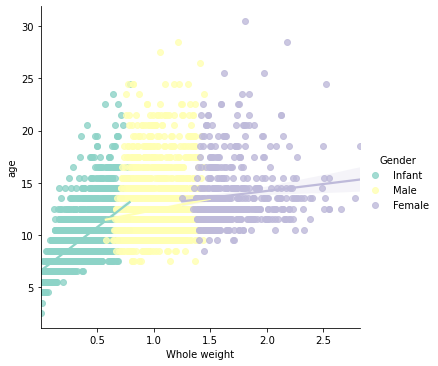

In [42]:
sns.lmplot(x='Whole weight',y='age',data=df,hue='Gender',palette='Set3')

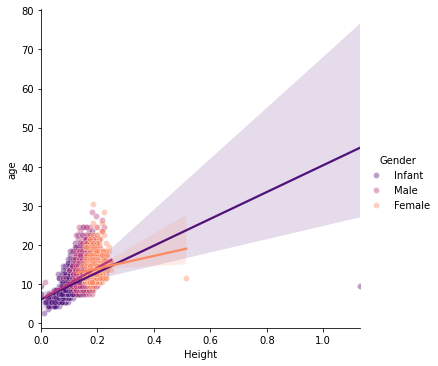

In [43]:
sns.lmplot(x='Height',y='age',data=df,hue='Gender',palette='magma',scatter_kws={'edgecolor':'white','alpha':0.4,'linewidth':0.5})

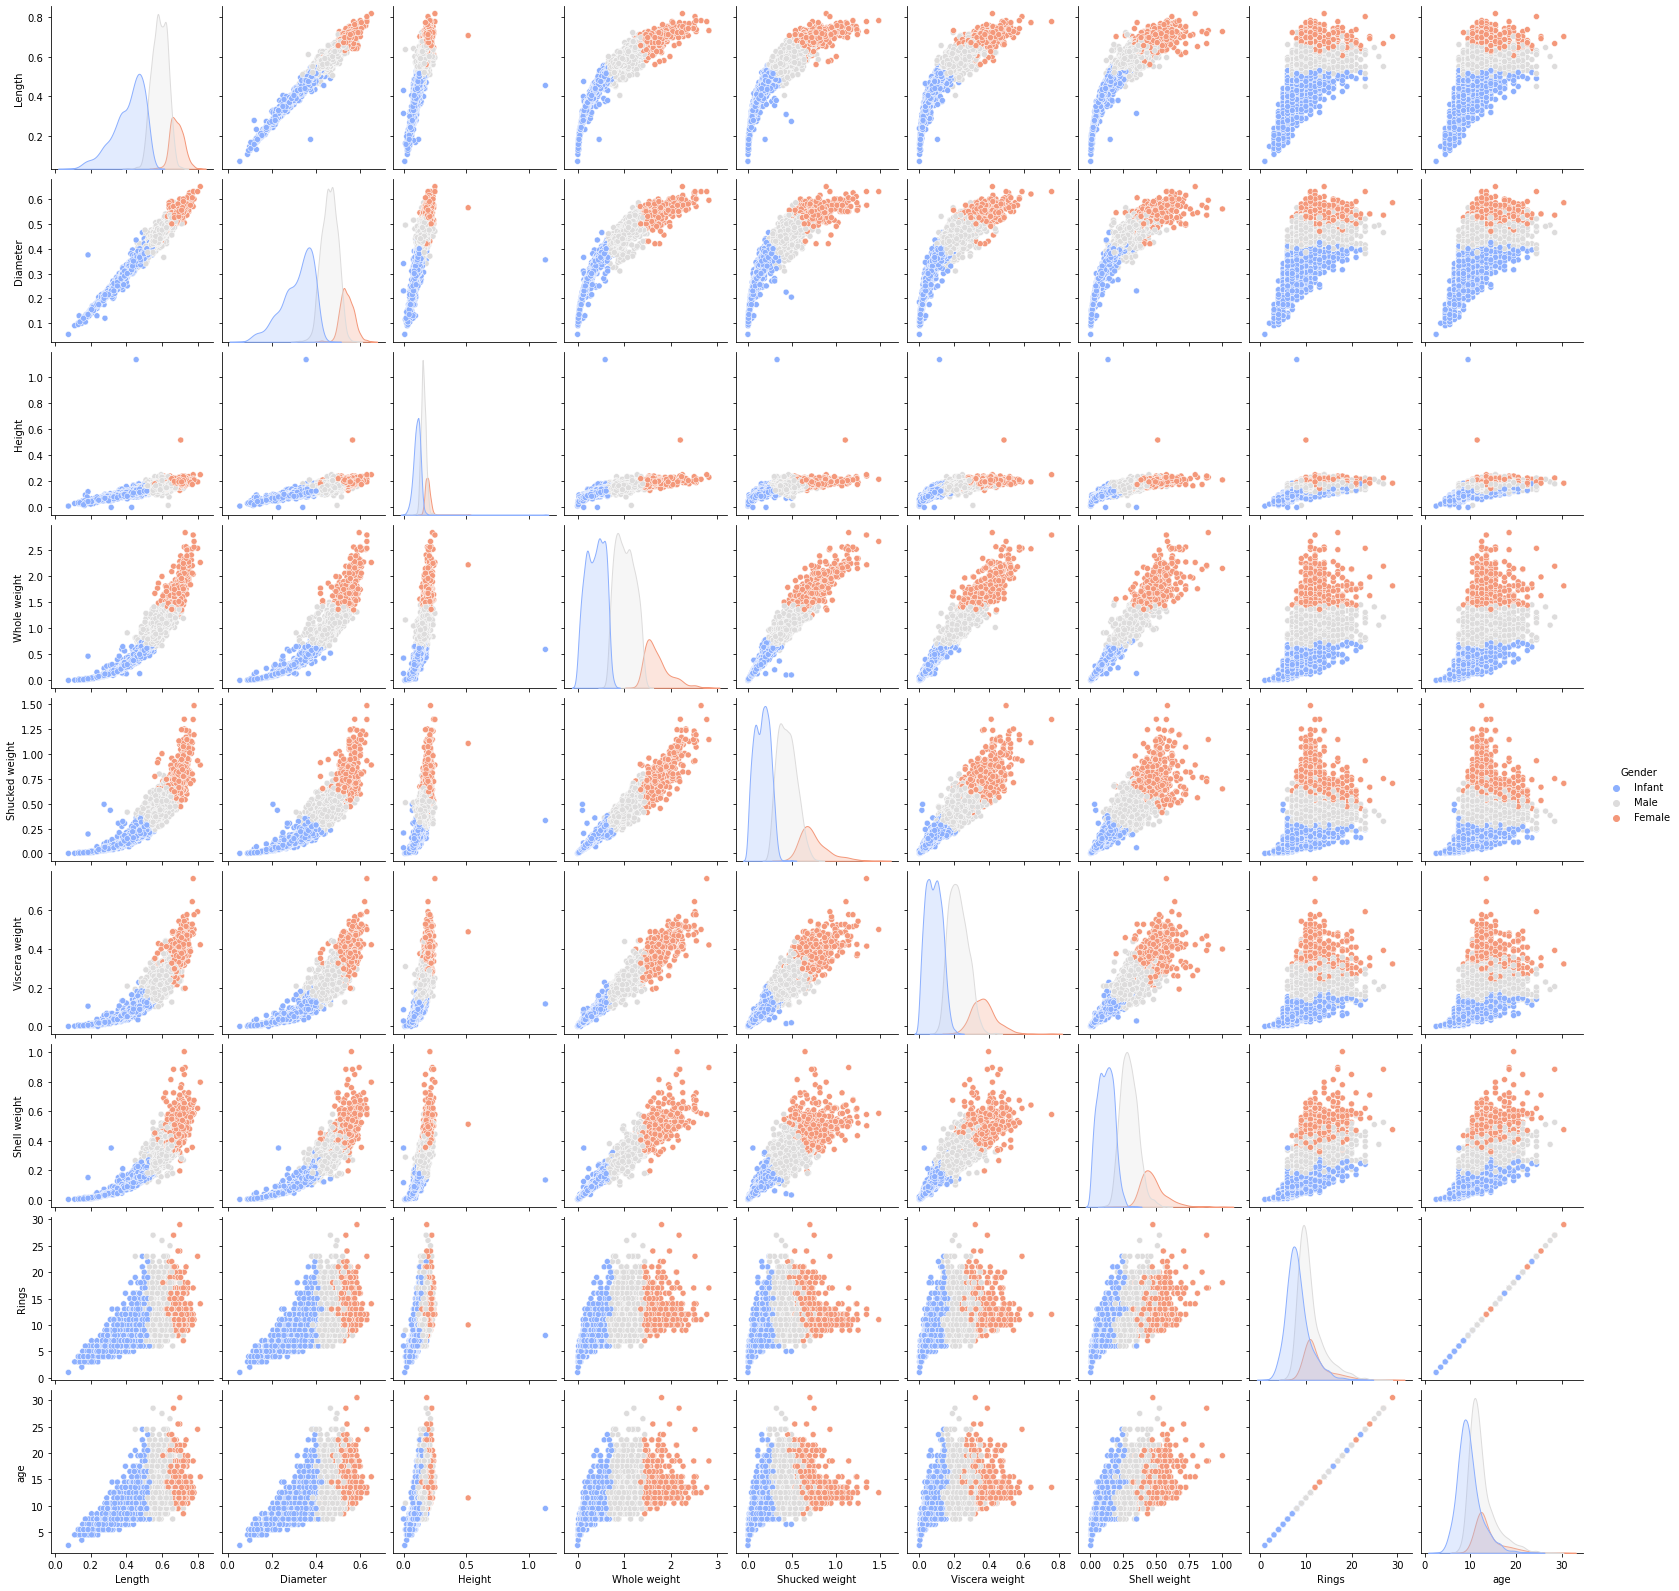

In [44]:
sns.pairplot(df,hue='Gender',palette='coolwarm')

In [45]:
for i in df['Gender']:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])

### 3D Visualization

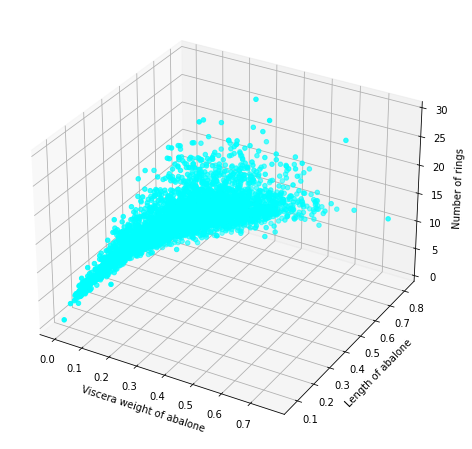

In [46]:
fig = plt.figure(figsize=(16,8))
ax= plt.axes(projection='3d')
ax.set_xlabel('Viscera weight of abalone')
ax.set_ylabel('Length of abalone')
ax.set_zlabel('Number of rings')

ax.scatter3D(df['Viscera weight'],df['Length'],df['Rings'],c='cyan')

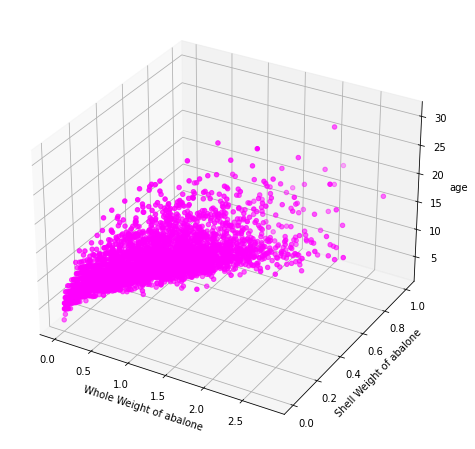

In [47]:
fig = plt.figure(figsize=(16,8))
ax= plt.axes(projection='3d')
ax.set_xlabel('Whole Weight of abalone')
ax.set_ylabel('Shell Weight of abalone')
ax.set_zlabel('age')

ax.scatter3D(df['Whole weight'],df['Shell weight'],df['age'],c='magenta')

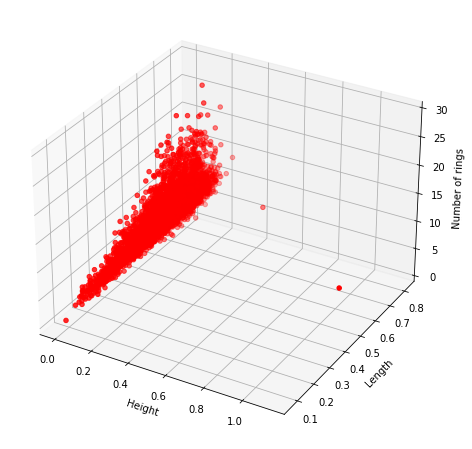

In [48]:
fig = plt.figure(figsize=(16,8))
ax= plt.axes(projection='3d')
ax.set_xlabel('Height')
ax.set_ylabel('Length')
ax.set_zlabel('Number of rings')

ax.scatter3D(df['Height'],df['Length'],df['Rings'],c='red')

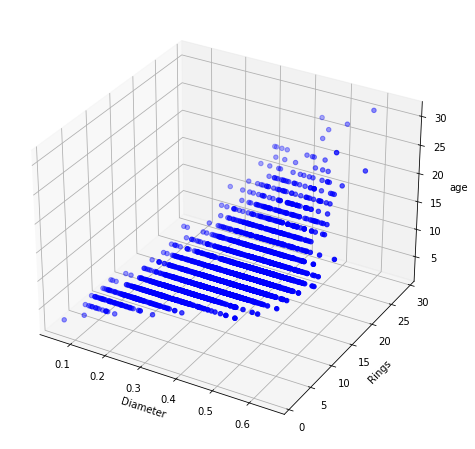

In [49]:
fig = plt.figure(figsize=(16,8))
ax= plt.axes(projection='3d')
ax.set_xlabel('Diameter')
ax.set_ylabel(' Rings')
ax.set_zlabel('age')

ax.scatter3D(df['Diameter'],df['Rings'],df['age'],c='blue')

### Interactive Plot

In [50]:
atributes_sex = df[['Gender','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']].groupby('Gender').mean()
cols = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
atributes_sex.columns = cols

In [51]:
trace1 = go.Bar(
    y=list(atributes_sex.iloc[2]),
    x=atributes_sex.columns.values,
    name='Class 1',
    marker=dict(
        color='navy'
    )
)
trace2 = go.Bar(
    y=list(atributes_sex.iloc[0]),
    x=atributes_sex.columns.values,
    name='Class 2',
    marker=dict(
        color='mediumslateblue'
    )
)
trace3 = go.Bar(
    y=list(atributes_sex.iloc[1]),
    x=atributes_sex.columns.values,
    name='Class 0',
    marker=dict(
        color='cornflowerblue'
    )
)

data = [trace1, trace2,trace3]
layout = go.Layout(
    title='Features',
    font=dict(
        size=18
    ),
    legend=dict(
        font=dict(
            size=18
        )
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)
plt.show()

### MultiColinearity

 - Reason to check multicolinearity is that correlation between the features is very high it may be leads to a multicolinearity issue

In [52]:
x=df.iloc[:,:-3]
y=df.iloc[:,-1]

In [53]:
x = sm.add_constant(x)

In [54]:
x.head()

const  Length  Diameter  Height  Whole weight  Shucked weight  \
0    1.0   0.455     0.365   0.095        0.5140          0.2245   
1    1.0   0.350     0.265   0.090        0.2255          0.0995   
2    1.0   0.530     0.420   0.135        0.6770          0.2565   
3    1.0   0.440     0.365   0.125        0.5160          0.2155   
4    1.0   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  
0          0.1010         0.150  
1          0.0485         0.070  
2          0.1415         0.210  
3          0.1140         0.155  
4          0.0395         0.055

In [55]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     665.2
Date:                Tue, 10 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:07:42   Log-Likelihood:                -9250.0
No. Observations:                4177   AIC:                         1.852e+04
Df Residuals:                    4169   BIC:                         1.857e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4852      0.269     16.666      0.000       3.958       5.013
Length            -1.5719      1.825     -0.861      0.389      -5.149       2.006
Diameter          13.3609      2.237      5.972      0.000       8.975      17.747
Height            11.8261      1.548      7.639      0.000       8.791      14.861
Whole weight       9.2474      0.733     12.622      0.000       7.811      10.684
Shucked weight   -20.2139      0.823    -24.552      0.000     -21.828     -18.600
Viscera weight    -9.8297      1.304     -7.538      0.000     -12.386      -7.273
Shell weight       8.5762      1.137      7.545      0.000       6.348      10.805
==============================================================================
Omnibus:                      933.799   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2602.745
Skew:                           1.174   Prob(JB):                         0.00
Kurtosis:                       6.072   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**By the Summary chart**
 
- We can see that Length Column's Pvalue is greater than 0.05 i.e accepting alternate hypothesis we can drop it but Length also   place a major role for predicting age so we'll no drop it

In [56]:
df

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  Gender   age  
0           0.1500     15       1  16.5  
1           0.0700      7       1   8.5  
2           0.2100      9       1  10.5  
3           0.1550     10       1  11.5  
4           0.0550      7       1   8.5  
...            ...    ...     ...   ...  
4172        0.2490     11       2  12.5  
4173        0.2605     10       2  11.5  
4174        0.3080      9       2  10.5  
4175        0.2960     10       2  11.5  
4176        0.4950     12       0  13.5  

[4177 rows x 10 columns]

### Spliting the Regression Dataset into Features and Labels

In [57]:
x=df.iloc[:,[0,1,2,3,4,5,6]]
y=df.iloc[:,-1]

### Dividing Training set and Testing set

In [58]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.33,random_state=42)

# Building Regression Model

### Linear Regression Model

In [59]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(f"MAE -: {mae(ytest, ypred)}")
    print(f"MSE -: {mse(ytest, ypred)}")
    print(f"RMSE -: {np.sqrt(mse(ytest, ypred))}")
    print(f"R-squared -: {r2_score(ytest, ypred)}")

In [60]:
models = []

models.append(("Linear-:",LinearRegression()))
models.append(("RF    -:",RandomForestRegressor()))
models.append(("SVM   -:",SVR()))
models.append(("XGB   -:",XGBRegressor()))

for name,model in models:
    print(name)
    mymodel(model)
    print()
    print()
    print()

Linear-:
MAE -: 1.6318220224904245
MSE -: 4.948527547938054
RMSE -: 2.224528612524023
R-squared -: 0.5117016921011471



RF    -:
MAE -: 1.5885206671501086
MSE -: 4.947612255257432
RMSE -: 2.2243228756764233
R-squared -: 0.5117920090414593



SVM   -:
MAE -: 1.5144163355671025
MSE -: 4.789022158984854
RMSE -: 2.1883834579398678
R-squared -: 0.5274409621713017



XGB   -:
MAE -: 1.6995967432067738
MSE -: 5.625570333760582
RMSE -: 2.371828478992649
R-squared -: 0.4448941734019699





### Models are not accurately predicting continuous values of age


- To prevent from these we'll create a Age Class Based on the continuous age label 

In [61]:
df['age'].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
3.5       1
26.5      1
27.5      1
30.5      1
2.5       1
Name: age, dtype: int64

### Reason For the specific value is there are total 28 unique values it want to classify in 3 class so 28/3

In [62]:
df_1 = df.copy()
Age = []
for i in df_1["age"]:
    if i < 9.33:
        Age.append('1')
    if i > 9.33 and i< 18.66 :
        Age.append('2')
    if i > 18.66:
        Age.append('3')
df_1["Age"] = Age
df_1.drop('age',axis=1,inplace=True)
df_1.head()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Gender Age  
0         0.150     15       1   2  
1         0.070      7       1   1  
2         0.210      9       1   2  
3         0.155     10       1   2  
4         0.055      7       1   1

In [63]:
df_1['Age'].value_counts()

2    3202
1     839
3     136
Name: Age, dtype: int64

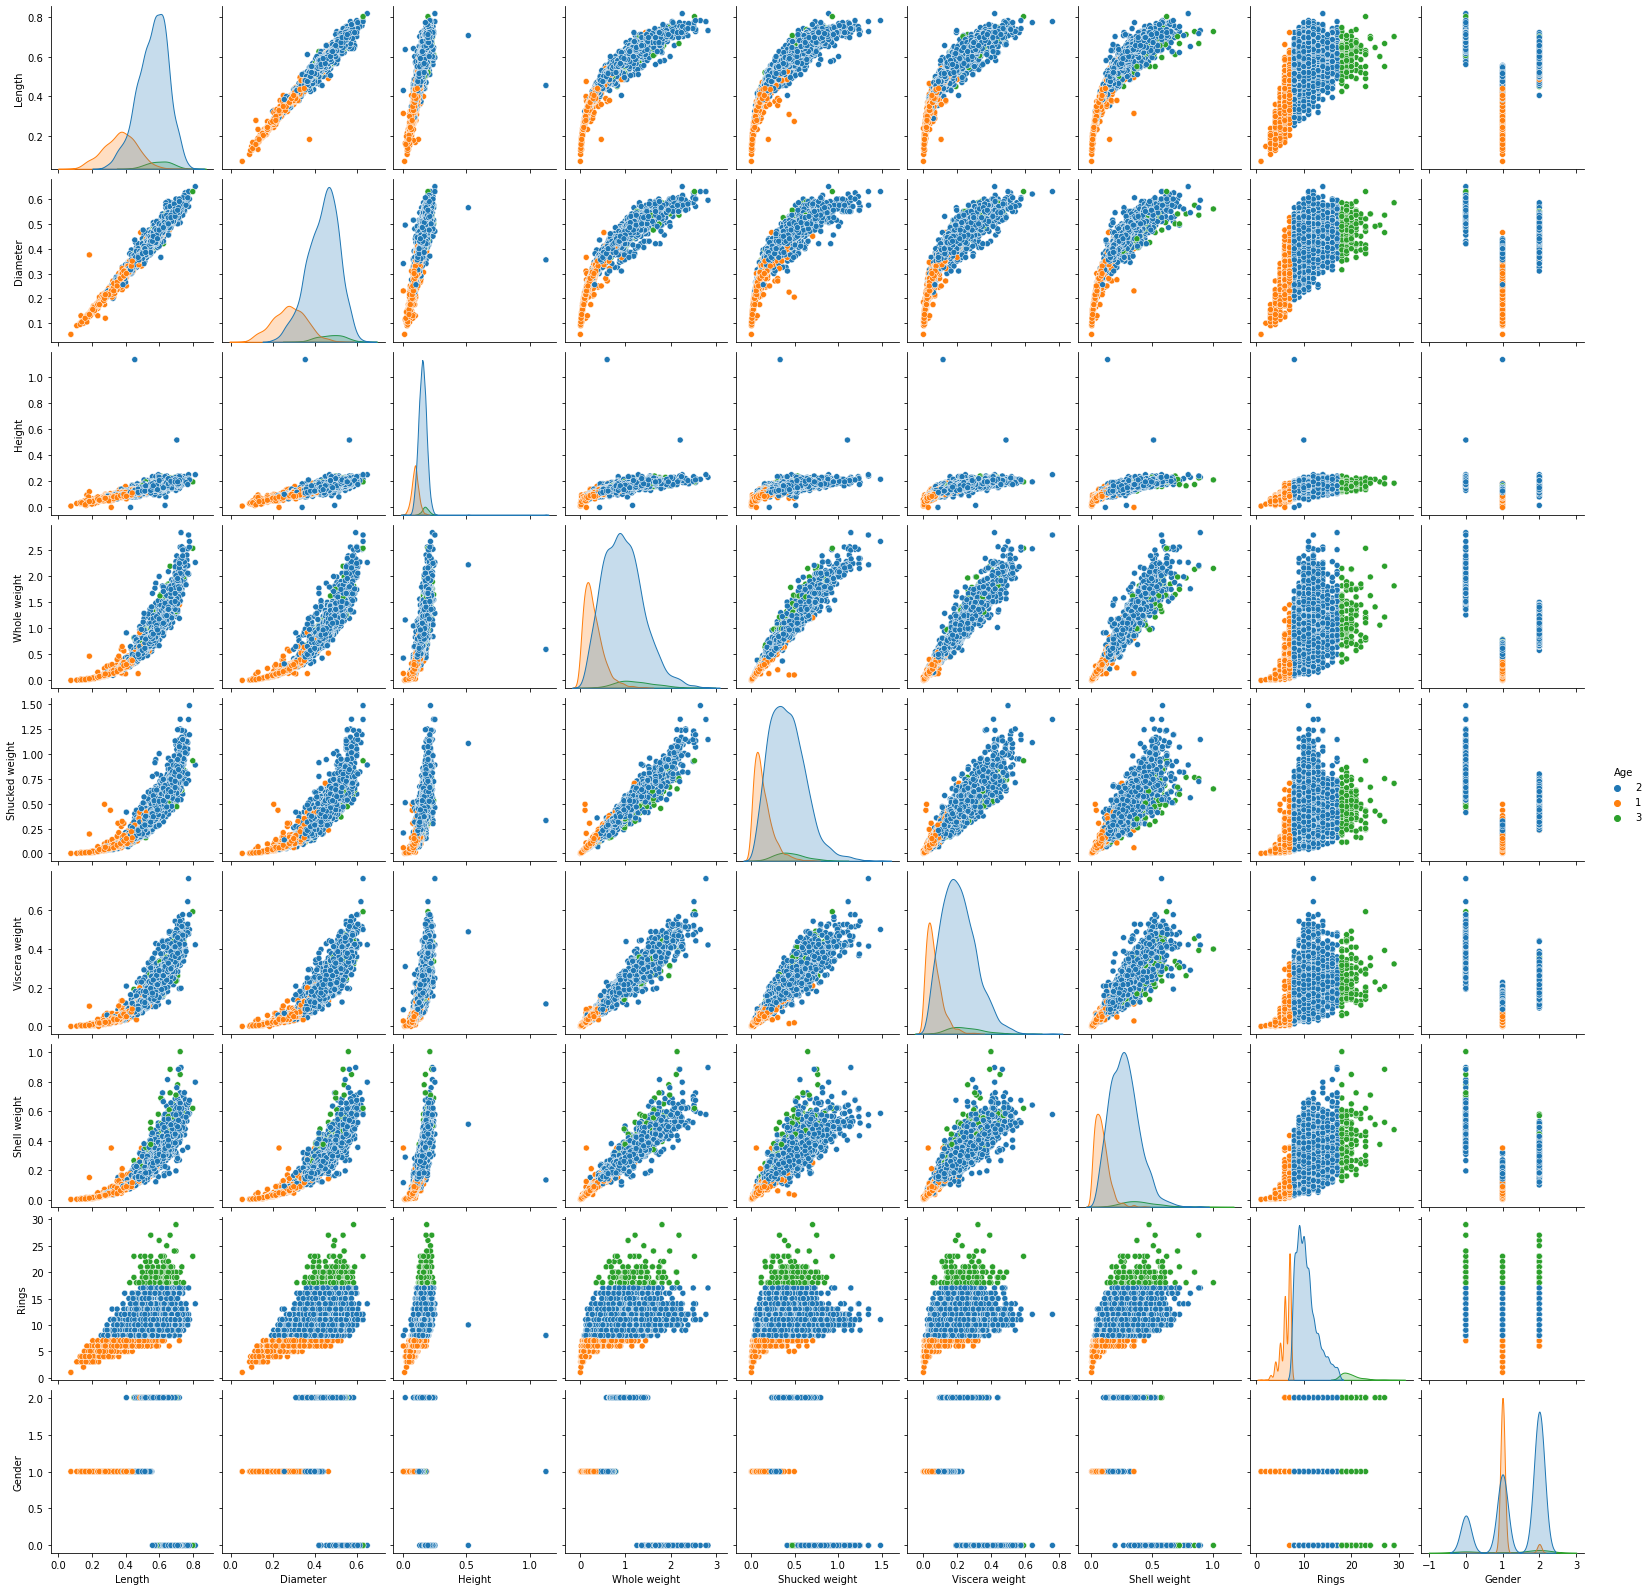

In [64]:
sns.pairplot(df_1,hue='Age')

### Splitting the Classification dataset into features and labels

In [65]:
x = df_1.iloc[:,:-3]
y = df_1.iloc[:,-1]

### Scaling

In [66]:
sc = StandardScaler()
x=sc.fit_transform(x)

### Dividing into train set and test set

In [67]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.33,random_state=42)

### Model Building

In [68]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print("Accuracy_score -: ",accuracy_score(ytest,ypred))
    print()
    print("Training_Score -: ",model.score(xtrain,ytrain))
    print()
    print("Testing_Score -: ",model.score(xtest,ytest))
    print()
    print(" Classification_report \n",classification_report(ytest,ypred))

In [69]:
models = []
models.append(('SVM    -:',SVC()))
models.append(('KNN    -:',KNeighborsClassifier(n_neighbors=3)))
models.append(('RF     -:',RandomForestClassifier()))

In [70]:
for name,model in models:
    print(name)
    mymodel(model)

SVM    -:
Accuracy_score -:  0.8578680203045685

Training_Score -:  0.8652609006433166

Testing_Score -:  0.8578680203045685

 Classification_report 
               precision    recall  f1-score   support

           1       0.80      0.65      0.72       302
           2       0.87      0.95      0.91      1034
           3       0.00      0.00      0.00        43

    accuracy                           0.86      1379
   macro avg       0.56      0.54      0.54      1379
weighted avg       0.83      0.86      0.84      1379

KNN    -:
Accuracy_score -:  0.8288614938361131

Training_Score -:  0.909578270192995

Testing_Score -:  0.8288614938361131

 Classification_report 
               precision    recall  f1-score   support

           1       0.74      0.63      0.68       302
           2       0.86      0.92      0.89      1034
           3       0.16      0.07      0.10        43

    accuracy                           0.83      1379
   macro avg       0.59      0.54      0.55   

# HyperParameter Tunning


### K Neighbors Classifier

In [71]:
rsq = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    rsq.append(ac)

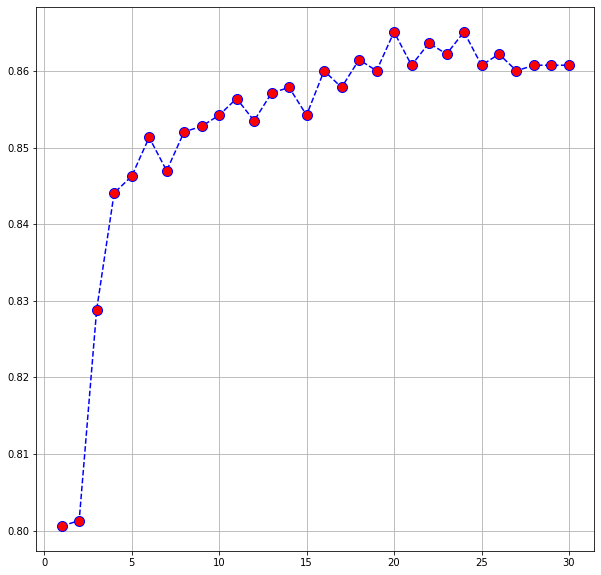

In [72]:
plt.figure(figsize=(10,10))
plt.plot(range(1,31),rsq,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize='10')
plt.grid(True)

In [73]:
rsq

[0.8005801305293692,
 0.8013052936910805,
 0.8288614938361131,
 0.8440899202320522,
 0.8462654097171863,
 0.851341551849166,
 0.8469905728788978,
 0.8520667150108775,
 0.8527918781725888,
 0.8542422044960116,
 0.8564176939811458,
 0.8535170413343002,
 0.8571428571428571,
 0.8578680203045685,
 0.8542422044960116,
 0.8600435097897027,
 0.8578680203045685,
 0.8614938361131255,
 0.8600435097897027,
 0.8651196519216824,
 0.860768672951414,
 0.8636693255982596,
 0.8622189992748368,
 0.8651196519216824,
 0.860768672951414,
 0.8622189992748368,
 0.8600435097897027,
 0.860768672951414,
 0.860768672951414,
 0.860768672951414]

In [74]:
knn = KNeighborsClassifier(n_neighbors=20)

In [75]:
mymodel(knn)

Accuracy_score -:  0.8651196519216824

Training_Score -:  0.8716940671908506

Testing_Score -:  0.8651196519216824

 Classification_report 
               precision    recall  f1-score   support

           1       0.80      0.71      0.75       302
           2       0.88      0.95      0.91      1034
           3       0.00      0.00      0.00        43

    accuracy                           0.87      1379
   macro avg       0.56      0.55      0.55      1379
weighted avg       0.84      0.87      0.85      1379



### Support Vector Classifier

In [76]:
rs=RandomizedSearchCV(SVC(gamma='auto'),
                      {'C':[1,10,20],'kernel':['rbf','linear']},
                      cv=5,
                      return_train_score=False,
                      n_iter=2
                     )

In [77]:
rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_iter=2,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']})

In [78]:
rs.best_params_

{'kernel': 'linear', 'C': 10}

In [79]:
rs.best_score_

0.8659800664451828

### Random Forest Classifier

In [80]:
paras= {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
    
gr=GridSearchCV(estimator=RandomForestClassifier(),param_grid=paras,cv = 3,n_jobs=-1,verbose=2)

gr.fit(xtrain, ytrain)
ypred = gr.predict(xtest)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [81]:
gr.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

In [82]:
gr.best_score_

0.8663363831656615

In [83]:
rf=RandomForestClassifier(bootstrap=True,max_depth=80,max_features =2,min_samples_leaf= 5,min_samples_split=30,n_estimators= 100,random_state=8)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)


print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

0.8694706308919506
              precision    recall  f1-score   support

           1       0.83      0.68      0.75       302
           2       0.88      0.96      0.92      1034
           3       0.00      0.00      0.00        43

    accuracy                           0.87      1379
   macro avg       0.57      0.55      0.56      1379
weighted avg       0.84      0.87      0.85      1379



# Conclusion

### By the above analysis done, we can conclude that,

**Classification after clusteing**
 
- Out of three classification models knn is giving more accuracy as compare to other models i.e 97%

**Regression after creating continuous age column**

- Regression models are not accurately predicting Continuous data
  accuracy = 53%

**Classification after creating classes of age**

- After creating classes of age models are giving maximum accuracy of 87% by almost all three models.






# Result

- In the light of evidence,we came to a result that by using dimensions of abalone now anyone can easily predict the gender,age and current price of the abalone shell